In [129]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random

In [130]:
import os

datadir = 'selfDrivingCar_datasets'
columns = ['center_img', 'left_img', 'right_img', 'steering', 'throttle', 'reverse', 'speed'] # column name of a car dataset

# selfDrivingCar_datasets/driving_log.csv (maybe '/' on linux and '\' on windows) --> just easier for crossplatform
filePath = os.path.join(
    datadir, 'driving_log.csv'
) 

data = pd.read_csv(
    filepath_or_buffer=filePath,
    names=columns # since there are no columns name in the dataset, we want to name it (we already know what they are)
)

pd.set_option('display.max_colwidth', None) # by default, info too long will be cut off, we want to see it all

data.head()



,center_img,left_img,right_img,steering,throttle,reverse,speed
0,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_490.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\left_2022_12_27_10_31_51_490.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\right_2022_12_27_10_31_51_490.jpg,0.0,0.0,0,0.000078
1,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_591.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\left_2022_12_27_10_31_51_591.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\right_2022_12_27_10_31_51_591.jpg,0.0,0.0,0,0.000081
2,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_695.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\left_2022_12_27_10_31_51_695.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\right_2022_12_27_10_31_51_695.jpg,0.0,0.0,0,0.000079
3,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_797.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\left_2022_12_27_10_31_51_797.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\right_2022_12_27_10_31_51_797.jpg,0.0,0.0,0,0.000081
4,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_898.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\left_2022_12_27_10_31_51_898.jpg,C:\Home\development\self_driving_simulator-windows-64\data\IMG\right_2022_12_27_10_31_51_898.jpg,0.0,0.0,0,0.000078


In [131]:
import ntpath

# since we dont want the whole 'C:\Home\...\fileName' .. we just want the file name
data.loc[[0], ['center_img']]

,center_img
0,C:\Home\development\self_driving_simulator-windows-64\data\IMG\center_2022_12_27_10_31_51_490.jpg


In [132]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

# apply function to all rows in a column
data['center_img'] = data['center_img'].apply(path_leaf)
data['left_img'] = data['left_img'].apply(path_leaf)
data['right_img'] = data['right_img'].apply(path_leaf)
data.head()

,center_img,left_img,right_img,steering,throttle,reverse,speed
0,center_2022_12_27_10_31_51_490.jpg,left_2022_12_27_10_31_51_490.jpg,right_2022_12_27_10_31_51_490.jpg,0.0,0.0,0,0.000078
1,center_2022_12_27_10_31_51_591.jpg,left_2022_12_27_10_31_51_591.jpg,right_2022_12_27_10_31_51_591.jpg,0.0,0.0,0,0.000081
2,center_2022_12_27_10_31_51_695.jpg,left_2022_12_27_10_31_51_695.jpg,right_2022_12_27_10_31_51_695.jpg,0.0,0.0,0,0.000079
3,center_2022_12_27_10_31_51_797.jpg,left_2022_12_27_10_31_51_797.jpg,right_2022_12_27_10_31_51_797.jpg,0.0,0.0,0,0.000081
4,center_2022_12_27_10_31_51_898.jpg,left_2022_12_27_10_31_51_898.jpg,right_2022_12_27_10_31_51_898.jpg,0.0,0.0,0,0.000078


bins : 
 [-1.         -0.92977698 -0.85955397 -0.78933095 -0.71910794 -0.64888492
 -0.5786619  -0.50843889 -0.43821587 -0.36799286 -0.29776984 -0.22754682
 -0.15732381 -0.08710079 -0.01687778  0.05334524  0.12356826  0.19379127
  0.26401429  0.3342373   0.40446032  0.47468334  0.54490635  0.61512937
  0.68535238  0.7555754 ]
bins[:-1] : 
 [-1.         -0.92977698 -0.85955397 -0.78933095 -0.71910794 -0.64888492
 -0.5786619  -0.50843889 -0.43821587 -0.36799286 -0.29776984 -0.22754682
 -0.15732381 -0.08710079 -0.01687778  0.05334524  0.12356826  0.19379127
  0.26401429  0.3342373   0.40446032  0.47468334  0.54490635  0.61512937
  0.68535238]
bins[1:] : 
 [-0.92977698 -0.85955397 -0.78933095 -0.71910794 -0.64888492 -0.5786619
 -0.50843889 -0.43821587 -0.36799286 -0.29776984 -0.22754682 -0.15732381
 -0.08710079 -0.01687778  0.05334524  0.12356826  0.19379127  0.26401429
  0.3342373   0.40446032  0.47468334  0.54490635  0.61512937  0.68535238
  0.7555754 ]
centers: 
 [-0.96488849 -0.89466548

<BarContainer object of 25 artists>

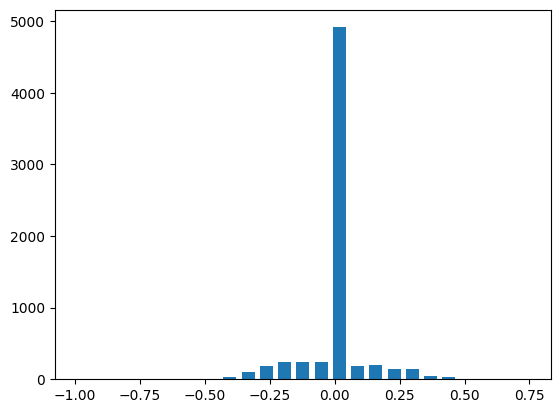

In [133]:
# visulaize the 'STEERING ANGLE' on histogram to see the DISTRIBUTION 
# see which steering angles are most frequent through out the driving the car

# devide maximum number of bins (categories), for ex: vals: -1 ... 1
# we want to devide that -1 ... 1 into 25 values (bins) to show on the graph
num_bins = 25 

hist, bins = np.histogram(data['steering'], num_bins) # get histogram values to show on bar chart

print('bins : \n', bins)
print('bins[:-1] : \n', bins[:-1])
print('bins[1:] : \n', bins[1:])

centers = (bins[1:] + bins[:-1]) * 0.5
print('centers: \n', centers)

plt.bar(centers, hist, width=0.05)

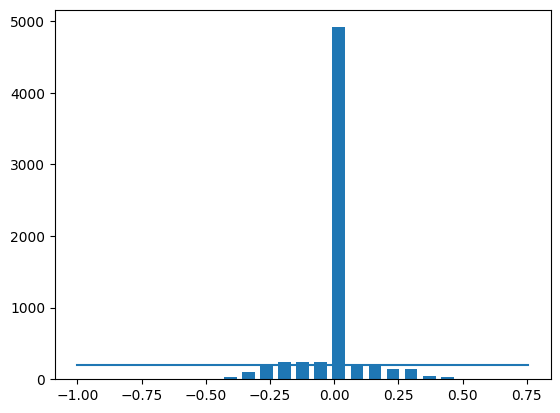

In [134]:
# we have more 0 angle because of the nature of the track 1 that we drove
# but if we train with this data, the neural network can be bias (sampling bias)
# and might always predict at 0 angle
# thus the car becomes biased towards driving straight all the time

# that's why we need a threshold of maximum 250 samples
samples_per_bin = 200
num_bins = 25 

# get histogram values to show on bar chart
# in a 'almost continuous' range, it will devide 25 to get 25 values only
# how the histogram works is: if a value is 0.01 rad
# but since value 0.01 >= 0.00 and <= 0.05 
# --> then it belongs to 0.00 bin (the tallest bin in the below image)  
hist, bins = np.histogram(data['steering'], num_bins) 
centers = (bins[1:] + bins[:-1]) * 0.5

plt.bar(centers, hist, width=0.05)
# smiply plot a line: (x1, x2) .. (y1, y2)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin)) 

total initial data:  6787
removed: 4852
remaining: 1935


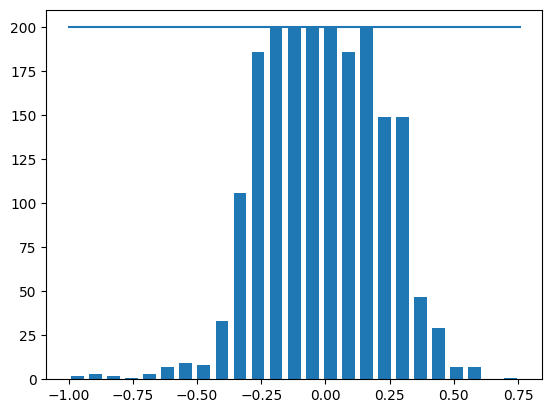

In [135]:
# balancing data
from sklearn.utils import shuffle

print('total initial data: ', len(data))

remove_list = [] # specify the samples we want to remove
for j in range(num_bins): # current bin (a steering angle)
  list_ = [] # we'll make use of this momentarily (chốc nữa sẽ dùng sau :) - trong chốc lát) - just me improving my vocabulary

  for i in range(len(data['steering'])): # current angle in 'steering' column

    # if the current angle in 'steering' column is between the 2 bins (2 steering angles)
    # then current angle belongs to current bin
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)

  list_ = shuffle(list_) # randomize after getting the data, so when remove the data, it still can GENERALIZE for the whole car track
  list_ = list_[samples_per_bin:] # thresh hold --> only get first 250 angles, the rest will be moved to REMOVE list
  remove_list.extend(list_) # spread the contents of what we want to dispose
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True) # drop data (rows) based on specified index data
print('remaining:', len(data)) 

hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(centers, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

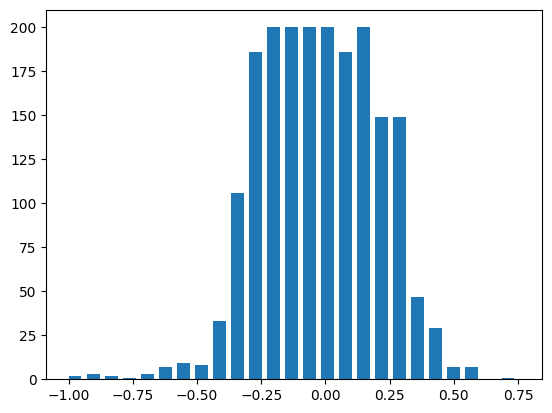

In [136]:
# or just simplt plot like this
plt.hist(data['steering'], num_bins, width=0.05);

In [137]:
# --> we solve the EXTREME BIAS dataset

print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = [] # input X
    steering = [] # label y

    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]

        # center image append (right now just get the center image)
        image_path.append(os.path.join(datadir, center.strip())) # strip() is just eliminate any spaces that maybe present in the string
        steering.append(float(indexed_data[3])) # current angle

        # left image append
        # image_path.append(os.path.join(datadir, left.strip()))
        # steering.append(float(indexed_data[3])+0.15) # current angle but change abit to enrich and genralize our data 

        # right image append
        # image_path.append(os.path.join(datadir, right.strip()))
        # steering.append(float(indexed_data[3])-0.15)

    # change to numpy array for better later minipulated
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

center_img    center_2022_12_27_10_31_52_209.jpg
left_img        left_2022_12_27_10_31_52_209.jpg
right_img      right_2022_12_27_10_31_52_209.jpg
steering                               -0.286275
throttle                                0.286275
reverse                                        0
speed                                   0.146484
Name: 7, dtype: object


In [138]:
from sklearn.model_selection import train_test_split

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1548
Valid Samples: 387


Text(0.5, 1.0, 'Validation set')

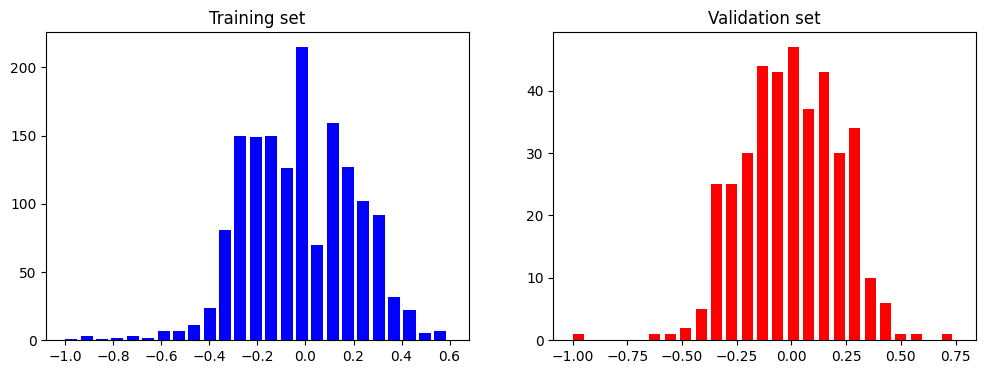

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Preprocessed Image')

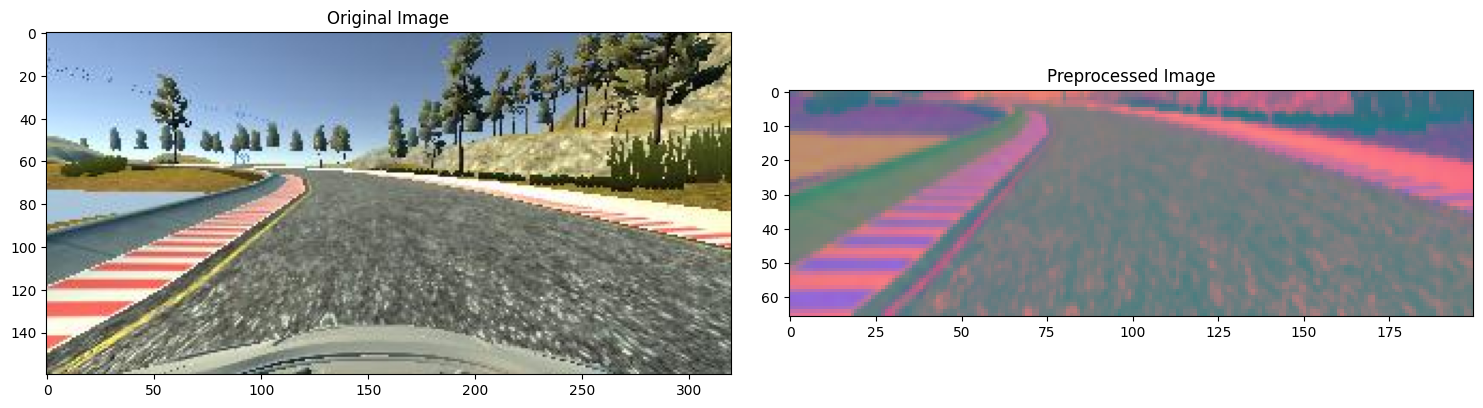

In [140]:
# preprocess image
import matplotlib.image as mpimg

def img_preprocess(img_path):
    img = mpimg.imread(img_path)
    
    img = img[60:135,:,:] # we only need the lane lines
    # YUV color space since we'll use NVIDIA MODEL to classify our image
    # and this color space is very effective for use in training
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # reduce noise in the image
    # this helps our model extract features 
    # because it has to deal with less noise
    img = cv2.GaussianBlur(img,  (3, 3), 0) 

    # decrease size for faster computation
    # 200 by 66 match the size of the input images used by NVIDIA model
    img = cv2.resize(img, (200, 66))
    
    # normalization (has no visual impact on our image)
    img = img/255
    return img

img_path = image_paths[100] # pick a random image
original_image = mpimg.imread(img_path)
preprocessed_image = img_preprocess(img_path)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [141]:
# appy all of our training images are processed correctly
# map function return a map obj --> change to list --> change to np array
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

In [142]:
# NVIDIA MODEL
# https://developer.nvidia.com/blog/deep-learning-self-driving-cars/

def nvidia_model():
    model = Sequential()
    # Nvidia model makes use of 24 filters 
    # subsmaple has been replaced with strides
    # simply just a 5x5 filter move 2 blocks each time
    model.add(Convolution2D(24, (5, 5), 
        strides=(2, 2), 
        input_shape=(66, 200, 3), 
        activation='relu')
    )

    model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='relu'))

    # at this point, the input image's dimension has decreased signigicantly 
    # for this reason, we just want normal strides = (1, 1) by default
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.5))
     
    model.add(Flatten()) # ----------------------------------------------
    
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(50, activation = 'relu'))
    #   model.add(Dropout(0.5))
    
    model.add(Dense(10, activation = 'relu'))
    #   model.add(Dropout(0.5))

    # output layer: car control
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

model = nvidia_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_4 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

c:\Home\development\me-selflearn-machinelearning\machinelearningenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [143]:
# regular training, gonna test with batch generator later to enrich our dataset and avoid overfitting
history = model.fit(
    X_train, y_train, 
    epochs=30,
    validation_data=(X_valid, y_valid),
    batch_size=100,
    verbose=1,
    shuffle = 1)

Epoch 1/30
16/16 [==============================] - 1s 35ms/step - loss: 0.0526 - val_loss: 0.0490
Epoch 2/30
16/16 [==============================] - 0s 23ms/step - loss: 0.0516 - val_loss: 0.0489
Epoch 3/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0509 - val_loss: 0.0469
Epoch 4/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0462 - val_loss: 0.0395
Epoch 5/30
16/16 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0338
Epoch 6/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0341 - val_loss: 0.0254
Epoch 7/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0266 - val_loss: 0.0232
Epoch 8/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 9/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 10/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0199 - val_loss: 0.0179
Epoch 11/

Text(0.5, 0, 'Epoch')

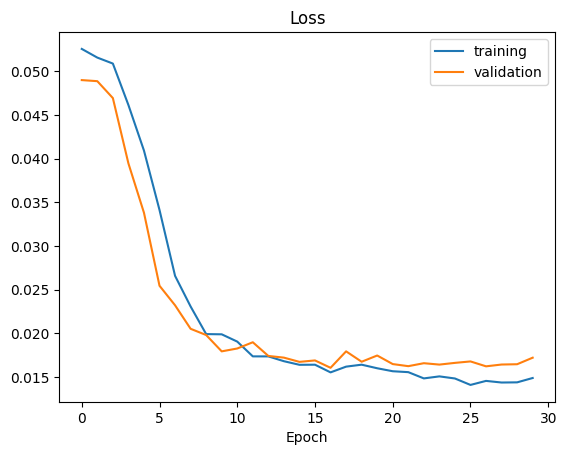

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [145]:
# that was such bad scores, the cause is the 'DYING RELU PROBLEM'
# which cause the loss to not decease, or the model does not learn any thing
# we'll change 'relu' to 'elu' and start running again

In [148]:
# NVIDIA MODEL
# https://developer.nvidia.com/blog/deep-learning-self-driving-cars/

def nvidia_model():
    model = Sequential()
    # Nvidia model makes use of 24 filters 
    # subsmaple has been replaced with strides
    # simply just a 5x5 filter move 2 blocks each time
    model.add(Convolution2D(24, (5, 5), 
        strides=(2, 2), 
        input_shape=(66, 200, 3), 
        activation='elu')
    )

    model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))

    # at this point, the input image's dimension has decreased signigicantly 
    # for this reason, we just want normal strides = (1, 1) by default
    model.add(Convolution2D(64, (3, 3), activation='elu'))
    model.add(Convolution2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
     
    model.add(Flatten()) # ----------------------------------------------
    
    model.add(Dense(100, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(0.5)) # add more dropout layer to have well trained model
    
    model.add(Dense(10, activation = 'elu'))
    model.add(Dropout(0.5))

    # output layer: car control
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

model = nvidia_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_8 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

Epoch 1/30
16/16 [==============================] - 1s 41ms/step - loss: 1.2529 - val_loss: 0.0588
Epoch 2/30
16/16 [==============================] - 0s 27ms/step - loss: 0.1625 - val_loss: 0.0439
Epoch 3/30
16/16 [==============================] - 0s 27ms/step - loss: 0.0799 - val_loss: 0.0420
Epoch 4/30
16/16 [==============================] - 0s 27ms/step - loss: 0.0681 - val_loss: 0.0403
Epoch 5/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0653 - val_loss: 0.0387
Epoch 6/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0643 - val_loss: 0.0374
Epoch 7/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0562 - val_loss: 0.0371
Epoch 8/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0551 - val_loss: 0.0353
Epoch 9/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0567 - val_loss: 0.0352
Epoch 10/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0530 - val_loss: 0.0338
Epoch 11/

Text(0.5, 0, 'Epoch')

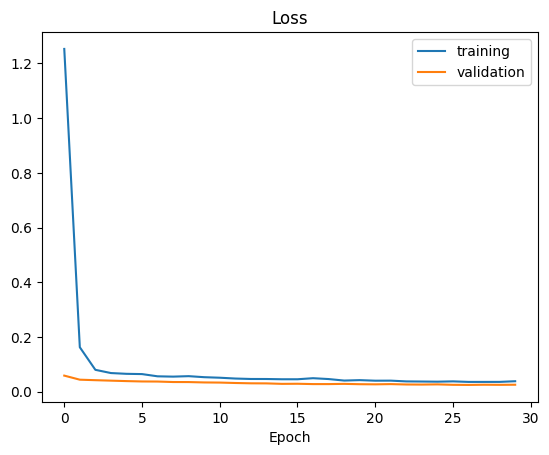

In [149]:
history = model.fit(
    X_train, y_train, 
    epochs=30,
    validation_data=(X_valid, y_valid),
    batch_size=100,
    verbose=1,
    shuffle = 1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [150]:
# finally saving our model :)
model_path = os.path.join('behavioral_cloning', 'self_driving_car_model.h5')
model.save(model_path)